In [43]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import exp,arange
from scipy.optimize import curve_fit
from scipy.fftpack import ifft,irfft, fftfreq
from itertools import combinations
import scipy.optimize as op
from past.builtins import xrange
from scipy.optimize import fsolve
from scipy.interpolate import UnivariateSpline

In [44]:
def FFT(xs,ys):
    '''
    It returns the FT of the ys values. 
    '''
    
    #amount_zeros=1000
    #zeros=np.zeros(amount_zeros)
    #ys=np.concatenate((zeros,ys,zeros))
    omega = np.fft.fftfreq(len(ys),d=xs[1]-xs[0])
    FT=np.fft.ifft(ys, norm='ortho')/(len(ys))
    
    return omega,FT


def FT_clas(omega,T,mu, xs, ys):
    '''
    semi-calssical analytical contribution, eq. 34 and 39 -- Ulmer's paper 

    '''   
    if mu<0:
        return 2j*np.exp(1j*omega*T)*np.sqrt(-mu)
    else:
        return -2*np.exp(1j*omega*T)*np.sqrt(mu)
    

def F_d(xs,ys):
    '''
    eq. 5.6  
    '''
    
    omega,FT=FFT(xs,ys)
    
    c_omega=omega*1j/(np.pi)
     
    first_term= np.exp(1j*omega*xs[-1])*ys[-1]-np.exp(1j*omega*xs[0])*ys[0]
    
    return omega,( first_term - 1j*omega*FT )/c_omega

In [45]:

def fit_Func(a,b,funct):
    
    '''
    fitting of the smoothed curve
    '''
    
    if funct=='ftd': 
        fitting_order=50
        begin_fit=0
        n_sample=len(a)
        xs = np.linspace(np.min(a), np.max(a), n_sample)
        
    elif funct=='ftc': 
        fitting_order=1
        n_sample=200
        begin_fit=np.where(a>np.max(a)-0.2)[0][0] 
        xs = np.linspace(a[begin_fit],np.max(a)+0.1, n_sample)
        
    z = np.polyfit(a[begin_fit:], b[begin_fit:], fitting_order)
    p = np.poly1d(z)
    ys=p(xs)
    
    #index_y_zero=np.where(predicted<=0)[0][0]
    
    return xs,ys, n_sample

def extend_Fc(xs,ys):
    
    xs_extension,ys_extension, n_points=fit_Func(xs,ys,'ftc')
    index_extension=np.where(xs_extension>np.max(xs))[0][0]
    xs_extended=np.append(xs,xs_extension[index_extension:])
    ys_extended=np.append(ys,ys_extension[index_extension:])

    
    return xs_extended,ys_extended


def magnification(F):
    return np.abs(F)**2

In [46]:
muI = np.load('muI.npy')
tauI = np.load('tauI.npy')
xs = np.load('xs.npy')
ys = np.load('ys.npy')
Ftd = np.load('Ftd.npy')
omega = np.fft.fftfreq(len(ys),d=xs[1]-xs[0])
c_omega=omega/(2j*np.pi)
Ft_list= np.load('Ft_list.npy')
tau_list= np.load('tau_list.npy')

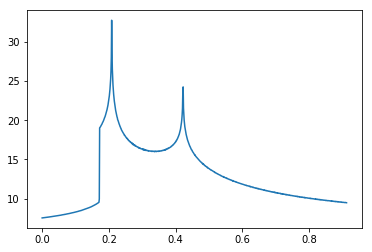

In [47]:
plt.plot(tau_list, Ft_list)

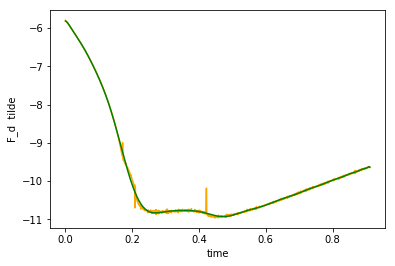

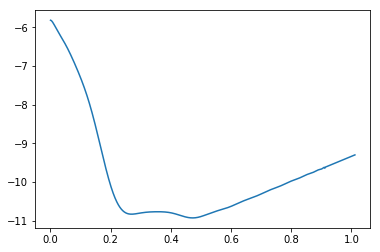

In [48]:
plt.plot(tau_list, Ftd, color='orange')
plt.plot(xs, ys, color='green')
plt.xlabel('time')
plt.ylabel('F_d  tilde')
plt.show()

xs_extended,ys_extended=extend_Fc(xs,ys)
plt.plot(xs_extended,ys_extended)
plt.show()

Using the functions decleared and with the data from the fitted curve we get the diffraction contribution. This explodes in 0. In order to find the error we manually calculate the integral for the FFT.

/Users/mrgr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in true_divide
/Users/mrgr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in true_divide


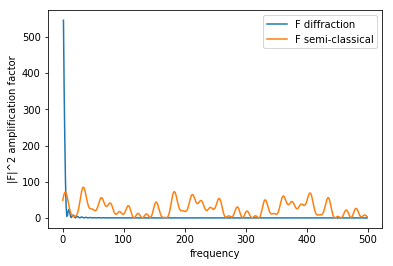

In [49]:
omega_,F_diff=F_d(xs,ys)

F_clas=np.zeros((4,len(omega)), dtype="complex_")


for i,(m,t) in enumerate(zip(muI,tauI)):
    F_clas[i,:]=FT_clas(omega,t,m, xs, ys)
F_clas=np.sum(F_clas,axis=0)


pos_indices=np.where(omega<0)[0][1]-1
plt.plot(omega_[:pos_indices], magnification(F_diff[:pos_indices]), label='F diffraction' )
plt.plot(omega_[:pos_indices], magnification(F_clas[:pos_indices]), label='F semi-classical')
#plt.plot(omega[:pos_indices], magnification(F_clas[:pos_indices]+F_diff[:pos_indices]), label='F full')
plt.xlabel('frequency')
plt.ylabel('|F|^2 amplification factor')
#plt.title(str(n_sample)+' sample points')
plt.legend()
#plt.xlim(0,150)

Using the Euler's formula we divide the contribution of the complex exponential in the FFT. We see that the integral is highly oscillating.

Text(0.5, 1.0, 'Real contribution')

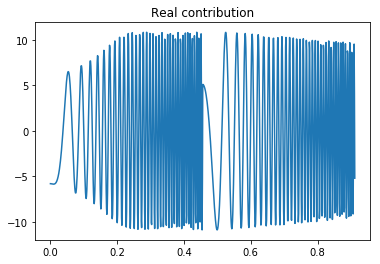

In [50]:
plt.plot(xs,np.cos(omega*xs)*ys)
plt.title('Real contribution')

Text(0.5, 1.0, 'Imaginary contribution')

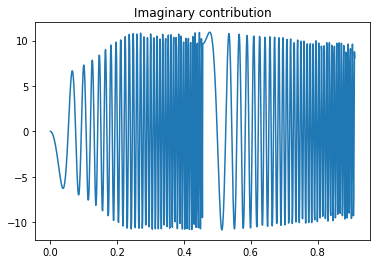

In [51]:
plt.plot(xs,np.sin(omega*xs)*ys)
plt.title('Imaginary contribution')

In [52]:
with open('Re_FT_levin.txt', 'r') as f:
    Re_FT_levin = f.read().splitlines()
    
with open('Im_FT_levin.txt', 'r') as f:
    Im_FT_levin = f.read().splitlines()

omega = fftfreq(len(ys),xs[1]-xs[0])
FT=ifft(ys)

In [53]:
with open('Cos_FT_levin.txt', 'r') as f:
    Cos_FT_levin = f.read().splitlines()
    
with open('Sin_FT_levin.txt', 'r') as f:
    Sin_FT_levin = f.read().splitlines()

Cos_FT_levin=np.asarray([complex(i) for i in Cos_FT_levin])
Sin_FT_levin=np.asarray([1j*complex(i) for i in Sin_FT_levin])

Re_FT_levin=np.asarray([complex(i) for i in Re_FT_levin])
Im_FT_levin=np.asarray([1j*complex(i) for i in Im_FT_levin])
FT_levin=Re_FT_levin+Im_FT_levin

In [54]:
FT_levin=Cos_FT_levin+Sin_FT_levin

Text(0.5, 1.0, 'Python FT')

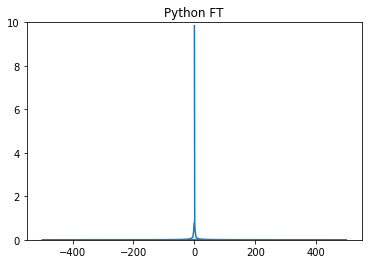

In [55]:
plt.plot(omega, np.abs(FT))
plt.ylim(0,10)
plt.title('Python FT')

Text(0.5, 1.0, 'Mathematica FT')

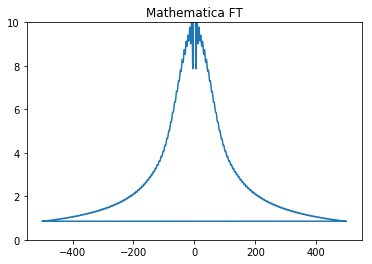

In [56]:
plt.plot(omega,np.abs(FT_levin))
plt.ylim(0,10)
plt.title('Mathematica FT')

In [76]:
c_omega=omega/(2j*np.pi)
first_term= np.exp(1j*omega*xs[-1])*ys[-1]-np.exp(1j*omega*xs[0])*ys[0]
Ff_plot=(first_term[1:] - 1j*omega[1:]*FT[1:])*c_omega[1:]

Text(0.5, 1.0, 'Python F diffraction')

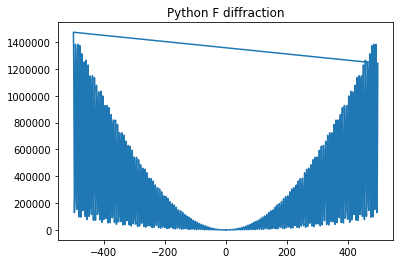

In [77]:
plt.plot(omega[1:],np.abs(Ff_plot)**2, label='F diffraction' )
#plt.ylim(0,2500)
plt.title('Python F diffraction')

Text(0.5, 1.0, 'Mathematica F diffraction')

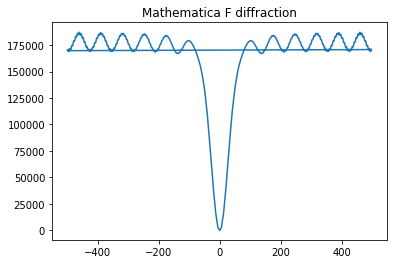

In [91]:
first_term_lev= np.exp(1j*omega*xs[-1])*ys[-1]-np.exp(1j*omega*xs[0])*ys[0]
Ff_plot_lev=(first_term[1:]- 1j*omega[1:]*FT_levin[1:])#*c_omega[1:]
plt.plot(omega[1:],np.abs(Ff_plot_lev)**2, label='F diffraction' )
#plt.ylim(0,2800)
plt.title('Mathematica F diffraction')

In [61]:
np.savetxt('omega.txt', omega, delimiter=' ')

In [45]:
len(xs)

912